# Week 6 Overview
This week, we will start learning NumPy, a Python package known for its efficient multidimensional arrays and library of functions. We will start with motivating the use of efficient array representations, and then demonstrate how NumPy provides those benefits. We will survey basic NumPy functionality for fast computation with lots of numbers, and wrap up with loading and saving data so we can use it for existing datasets. Next week, we will dig in on some of NumPy's more advanced, but tricky, features that enable its high performance when used judiciously.

### Learning Objectives
By the end of this week, you should be able to:
- Explain why specialized numeric arrays are useful
- Create and populate a NumPy array
- Read a NumPy array from a file
- Test whether a module is installed in the current environment
- Find NumPy documentation for a given function
### Think About It
- How often do you repeat a task before trying to streamline it?
- If you just learned a pattern, do you tend to see it more often?
- Would you gain more from making your simplest tasks twice as fast or your hardest tasks twice as fast? Which do you spend more time on?

## Introduction to Numpy
NumPy is a Python package providing efficient multidimensional arrays and a vast library of functions to compute efficiently with them. According to creator Travis Oliphant, the name NumPy comes from Numerical Python since it was developed to provide numerical arrays for SciPy, which he also created. We will be using NumPy's arrays to efficiently store, analyze, and model data. In addition, pandas and scikit-learn, which we will cover later in this module, are built on top of NumPy.

### From the Numpy Documentation (version 1.26)
NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy is best known for its efficient number arrays, which are a de facto standard interface for data science. Deep learning libraries such as Keras, TensorFlow, and PyTorch all directly support converting to and from NumPy arrays and make special efforts to work efficiently and share memory with NumPy. The recent Keras 3 release (fall 2023) included full NumPy API compatibility as one of its features.

## Lesson 6.2: Why Arrays?
Why do we use arrays?
1. They are a convenient way to work with lots of numbers, and match up with matrices in math.
2. Large arrays use less memory than corresponding Python lists.
3. Large arrays can be processed faster than corresponding Python lists.

The second and third reasons specify large arrays. For small arrays, array overhead might be slightly more than Python lists. If some of your usage will be large arrays, it usually makes sense to handle all of it with arrays instead of writing it twice. The large arrays will be a lot faster, and the small arrays will be almost as fast in most cases. Conveniently, most NumPy functions will accept lists of numbers and automatically convert them to arrays, which will make it easy for you to write functions for NumPy arrays and support lists of numbers too.

### Definition: Array
A k-dimensional array is a data structure holding a fixed number of th eelements of the same type whose access is determined by the array's shape.
- The array's shape is a tuple of k non-negative integers, $(l_0,\dots,l_{k} -1)$. An array of this shape may be referred to as an $(l_0,\dots,l_{k} -1)$, reading the x as "by". Each entry in the shape determines the length of that array along the corresponding axis.
- Indexes into the array are tuples of k integers bounded by the corresponding entry in the shape. For index $(i_0, \dots, i_k-1)$, the bounds are $-l_j \leq i_j < l_k - 1$. (Negative indexes count from the end of the axis. We will rarely use them.) The tuple parentheses can be omitted for brevity when indexing an array.
- The number of elements in the array is the product of the shape.

What does that mean?
- A 0-dimensional array is just a single value.
- A 1-dimensional array is like a list of numbers, but the numbers must all be the same type, and the length of the list is fixed.
- A 2-dimensional array is like a fixed length list of 1-dimensional arrays, all of the same type and length, and is indexed by a pair of integer. The first integer selects one of the 1-dimensional arrays, and the second selects a number in that 1-dimensional arrays.
- Higher dimensional arrays similarly behave like a 1-dimensional array of arrays with dimension one lower, all sharing the same type and shape.
- The last point about sharing type and shape is crucial. This limitation distinguishes arrays from lists which may contain different types, and allows contained lists to have any length.
- Here are some visualizations of the indexes of low dimensional arrays, each assuming array x with shape set to all fives.



In [238]:
# 0-dimensional
import numpy as np
x = []
x = np.array(x)
x

array([], dtype=float64)

In [239]:
# 1-dimensional
rows, cols = 5,1
array = np.empty((rows, cols), dtype=object)
for i in range(rows):
    for j in range(cols):
        array[i, j] = f'x[{i}]'
for row in array:
    print(row)

['x[0]']
['x[1]']
['x[2]']
['x[3]']
['x[4]']


In [240]:
# 2-Dimensional
rows, cols = 5,5
array = np.empty((rows, cols), dtype=object)
for i in range(rows):
    for j in range(cols):
        array[i, j] = f'x[{i}, {j}]'
for row in array:
    print(row)

['x[0, 0]' 'x[0, 1]' 'x[0, 2]' 'x[0, 3]' 'x[0, 4]']
['x[1, 0]' 'x[1, 1]' 'x[1, 2]' 'x[1, 3]' 'x[1, 4]']
['x[2, 0]' 'x[2, 1]' 'x[2, 2]' 'x[2, 3]' 'x[2, 4]']
['x[3, 0]' 'x[3, 1]' 'x[3, 2]' 'x[3, 3]' 'x[3, 4]']
['x[4, 0]' 'x[4, 1]' 'x[4, 2]' 'x[4, 3]' 'x[4, 4]']


If you are taking or have taken Module 1: Mathematical Foundations of Data Science, this should look similar to the matrix notation used there, except using brackets instead of subscripts. For two dimensional arrays, we typically use the first axis to specify a row and the second axis to specify a column. The first index specifies a row number counting from the top, and the second index specifies a column number counting from the left.

So what do we get from the rigidity of arrays compared to Python's flexible lists?

1. Type information needs to be stored just once and can be shared across values.
2. All the values can be packed tightly together using less space.
3. Individual values can be accessed directly instead of navigating through multiple lists.

Points one and two combine to mean that large arrays are a lot more size efficient. In week one, we saw that a 64 bit floating point number, which should take 8 bytes, actually took 24 bytes, a factor of 3 overhead. If we add the overhead of a Python list containing those numbers, the overhead increases to a factor of 4. What about an array containing the same numbers? The array overhead is barely over 1. (The video at the end of this lesson will show you the details.)

If you store many floating point values in a Python list, it will take four times more memory than using a NumPy array. Does that matter? Yes! For most computations, this means reading and writing four times more memory and running four times longer. The details vary - a computation doing a lot of work on each value will be affected less, while computations that spill over important thresholds (e.g. no longer fitting in RAM) will be affected more. But the bottom line is that a Python list is not very efficient if you are working with many numbers at once.

After cutting the 4x memory overhead, is there any more improvement from arrays? Yes, there is more improvement from cutting Python's computation overhead too. NumPy has a whole library of fast routines that are heavily optimized for NumPy's array layouts, and taking advantage of point three above. The details vary, but it is common to see claims of five to ten times speed improvements for large arrays, and even a hundred times is occasionally mentioned. Let's be frank - your code is unlikely to run a hundred times faster just from switching to NumPy, but five to ten times should not be surprising.

Your mileage may vary, and beware that these claims are for thousands or millions of numbers. You should expect a slowdown if you use NumPy to calculate with one or two numbers.

## Comparing Memory Usage of NumPy Arrays vs Python Lists
This video compares the memory usage of NumPy arrays and Python lists and exactly quantifies the differences in space usage.

At the beginning of this module, we saw that current 64-bit floating numbers which should take 8 bytes are actually taking 24 bytes.

In [241]:
import sys

In [242]:
sys.getsizeof(3.0)

24

What if we converted that to numpy?

In [243]:
import numpy as np
x = np.array(3.0)
sys.getsizeof(x)

104

Numpy is not the most efficient way to handle individual numbers. That is 13x overhead. Let's look at a bigger array:

In [244]:
test_array = np.arange(1_000_000, dtype=np.float64)
sys.getsizeof(test_array)

8000112

That test array just created has 1 million numbers, counting up from 0 like the range function. The `dtype` parameter is to be explicit about what type of array we are making, so we can be 100% certain, since each of those values take 8 bytes, the minimum place to store them is 8 million bytes, with 112 bytes of overhead.

Let's try a regular list:

In [245]:
test_list = [float(v) for v in range(1_000_000)]
sys.getsizeof(test_list)

8448728

That's about 6% bigger than the numpy array, but that does not include all of the numbers in the list. Only the memory consumption directly attributed to the python object is accounted for, not the memory consumption of the object it refers to, so it does not contain the size of the objects in the underlying list.

In [246]:
sys.getsizeof(test_list) + sum(sys.getsizeof(v) for v in test_list)

32448728

So storing the same numbers actually takes about 4 times as much space with a python list compared to a numpy array.

Python Data Science Handbook, Chapter 2.0, Introduction to NumPy. This chapter further motivates NumPy and gives other example applications.

This chapter, along with chapter 3, outlines techniques for effectively loading, storing, and manipulating in-memory data in Python. The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else. Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

For example, images–particularly digital images–can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area. Sound clips can be thought of as one-dimensional arrays of intensity versus time. Text can be converted in various ways into numerical representations, perhaps binary digits representing the frequency of certain words or pairs of words. No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers. (We will discuss some specific examples of this process later in Feature Engineering)

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science. We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package (discussed in Chapter 3).

This chapter will cover NumPy in detail. NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

### A python list is more than just a list
Let's consider now what happens when we use a Python data structure that holds many Python objects. The standard mutable multi-element container in Python is the list. We can create a list of integers as follows:

In [247]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [248]:
type(L[0])

int

Or similarly, a list of strings

In [249]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [250]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:

In [251]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

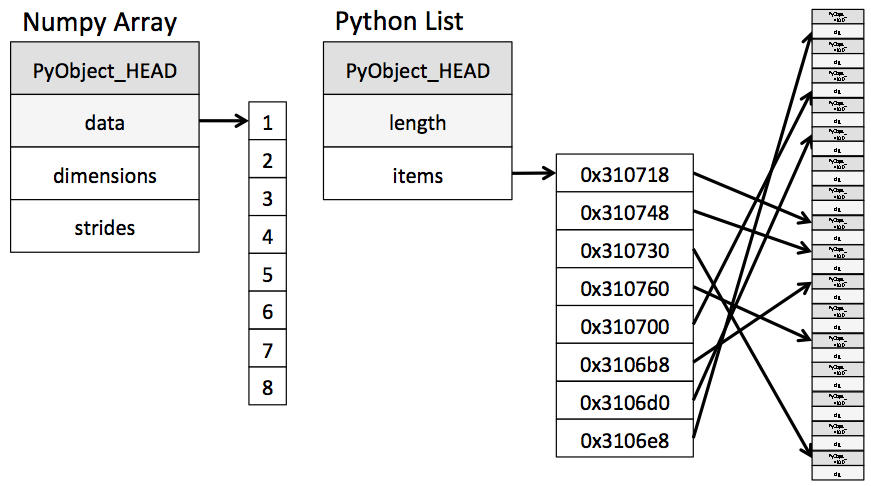

At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## Fixed-Type Arrays in Python
Python offers several different options for storing data in efficient, fixed-type data buffers. The built-in `array` module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [252]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here `'i'` is a type code indicating the contents are integers.

Much more useful, however, is the `ndarray` object of the NumPy package. While Python's `array` object provides efficient storage of array-based data, NumPy adds to this efficient *operations* on that data. We will explore these operations in later sections; here we'll demonstrate several ways of creating a NumPy array.

We'll start with the standard NumPy import, under the alias `np`:

In [253]:
import numpy as np

## Creating Arrays from Python Lists
First, we can use `np.array` to create arrays from Python lists:

In [254]:
# integer array
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):



In [255]:
np.array([3.14,3,2,3])

array([3.14, 3.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the `dtype` keyword:

In [256]:
np.array([1,2,3,4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [257]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Creating Arrays from Scratch:
Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy, here are several examples:

In [258]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [259]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [260]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [261]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [262]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [263]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.25241011, 0.97572458, 0.1197632 ],
       [0.20856888, 0.23983126, 0.39034023],
       [0.61318864, 0.8603706 , 0.34645385]])

In [264]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.80846432, -1.55328005,  1.09581535],
       [ 1.0034082 , -0.96307811,  0.38494418],
       [-2.10187333,  0.43009583, -0.66377698]])

In [265]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[1, 8, 6],
       [9, 9, 7],
       [6, 0, 9]])

In [266]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [267]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

## NumPy Standard Data Types
NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations. Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table. Note that when constructing an array, they can be specified using a string:

In [268]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

Or using the associated NumPy object:

In [269]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

| Data type	 | Description |
|-------------|-------------|
| `bool_`     | Boolean (True or False) stored as a byte |
| `int_`      | Default integer type (same as C `long`; normally either `int64` or `int32`)| 
| `intc`      | Identical to C `int` (normally `int32` or `int64`)| 
| `intp`      | Integer used for indexing (same as C `ssize_t`; normally either `int32` or `int64`)| 
| `int8`      | Byte (–128 to 127)| 
| `int16`     | Integer (–32768 to 32767)|
| `int32`     | Integer (–2147483648 to 2147483647)|
| `int64`     | Integer (–9223372036854775808 to 9223372036854775807)| 
| `uint8`     | Unsigned integer (0 to 255)| 
| `uint16`    | Unsigned integer (0 to 65535)| 
| `uint32`    | Unsigned integer (0 to 4294967295)| 
| `uint64`    | Unsigned integer (0 to 18446744073709551615)| 
| `float_`    | Shorthand for `float64`| 
| `float16`   | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| `float32`   | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| `float64`   | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| `complex_`  | Shorthand for `complex128`| 
| `complex64` | Complex number, represented by two 32-bit floats| 
| `complex128`| Complex number, represented by two 64-bit floats| 

## 6.4 Lesson: Building Numpy Arrays
The first two things you need to know to make a NumPy array are what data type you will use and what shape the array will be. The data type specifies whether you are working with floating point numbers, integers, or even a mix and how much space each one will use. The shape determines the number of axes and the length along each axis. Together, the data type and shape determine how many numbers can be stored in the array and how much memory they consume. Both usually have a clear best, or at least default, choice based on the context of your program.

### Converting Sequences to Numpy Arrays
There are 6 general mechanisms for creating arrays:
1. Conversion from other Python structures (i.e. lists and tuples)
2. Intrinsic NumPy array creation functions (e.g. arange, ones, zeros, etc.)
3. Replicating, joining, or mutating existing arrays
4. Reading arrays from disk, either from standard or custom formats
5. Creating arrays from raw bytes through the use of strings or buffers
6. Use of special library functions (e.g., random)

You can use these methods to create ndarrays or Structured arrays. This document will cover general methods for ndarray creation.

1) Converting Python sequences to NumPy arrays
NumPy arrays can be defined using Python sequences such as lists and tuples. Lists and tuples are defined using `[...]` and `(...)`, respectively. Lists and tuples can define ndarray creation:
- a list of numbers will create a 1D array,
- a list of lists will create a 2D array,

further nested lists will create higher-dimensional arrays. In general, any array object is called an ndarray in NumPy.

In [270]:
import numpy as np
a1D = np.array([1, 2, 3, 4])
a2D = np.array([[1, 2], [3, 4]])
a3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

When you use `numpy.array` to define a new array, you should consider the dtype of the elements in the array, which can be specified explicitly. This feature gives you more control over the underlying data structures and how the elements are handled in C/C++ functions. When values do not fit and you are using a `dtype`, NumPy may raise an error:

In [271]:
import numpy as np
np.array([127, 128, 129], dtype=np.int8)

/var/folders/4k/nl2zz_ln4d55dcscl_vvjglh0000gn/T/ipykernel_44205/1903986189.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 128 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([127, 128, 129], dtype=np.int8)
/var/folders/4k/nl2zz_ln4d55dcscl_vvjglh0000gn/T/ipykernel_44205/1903986189.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 129 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([127, 128, 129], dtype=np.int8)


array([ 127, -128, -127], dtype=int8)

An 8-bit signed integer represents integers from -128 to 127. Assigning the `int8` array to integers outside of this range results in overflow. This feature can often be misunderstood. If you perform calculations with mismatching `dtypes`, you can get unwanted results, for example:

In [272]:
import numpy as np
a = np.array([2, 3, 4], dtype=np.uint32)
b = np.array([5, 6, 7], dtype=np.uint32)
c_unsigned32 = a - b
print('unsigned c:', c_unsigned32, c_unsigned32.dtype)
c_signed32 = a - b.astype(np.int32)
print('signed c:', c_signed32, c_signed32.dtype)

unsigned c: [4294967293 4294967293 4294967293] uint32
signed c: [-3 -3 -3] int64


Notice when you perform operations with two arrays of the same `dtype`: `uint32`, the resulting array is the same type. When you perform operations with different `dtype`, NumPy will assign a new type that satisfies all of the array elements involved in the computation, here `uint32` and `int32` can both be represented in as `int64`.

The default NumPy behavior is to create arrays in either 32 or 64-bit signed integers (platform dependent and matches C `long` size) or double precision floating point numbers. If you expect your integer arrays to be a specific type, then you need to specify the dtype while you create the array.

###  2) Intrinsic NumPy array creation functions
NumPy has over 40 built-in functions for creating arrays as laid out in the Array creation routines. These functions can be split into roughly three categories, based on the dimension of the array they create:
1. 1D arrays
2. 2D arrays
3. ndarrays
### 1 - 1D array creation functions
The 1D array creation functions e.g. `numpy.linspace` and `numpy.arange` generally need at least two inputs, `start` and `stop`.

`numpy.arange` creates arrays with regularly incrementing values. Check the documentation for complete information and examples. A few examples are shown:

In [273]:
import numpy as np
np.arange(10)
np.arange(2, 10, dtype=float)
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

Note: best practice for `numpy.arange` is to use integer start, end, and step values. There are some subtleties regarding `dtype`. In the second example, the `dtype` is defined. In the third example, the array is `dtype=float` to accommodate the step size of `0.1`. Due to roundoff error, the `stop` value is sometimes included.

`numpy.linspace` will create arrays with a specified number of elements, and spaced equally between the specified beginning and end values. For example:

In [274]:
import numpy as np
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

The advantage of this creation function is that you guarantee the number of elements and the starting and end point. The previous arange(`start`, `stop`, `step`) will not include the value stop.

## 2 - 2D array creation functions
The 2D array creation functions e.g. `numpy.eye`, `numpy.diag`, and `numpy.vander` define properties of special matrices represented as 2D arrays.

`np.eye(n, m)` defines a 2D identity matrix. The elements where i=j (row index and column index are equal) are 1 and the rest are 0, as such:

In [275]:
import numpy as np
np.eye(3)
np.eye(3, 5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

`numpy.diag` can define either a square 2D array with given values along the diagonal *or* if given a 2D array returns a 1D array that is only the diagonal elements. The two array creation functions can be helpful while doing linear algebra, as such:

In [276]:
import numpy as np
np.diag([1, 2, 3])
np.diag([1, 2, 3], 1)
a = np.array([[1, 2], [3, 4]])
np.diag(a)

array([1, 4])

`vander(x, n)` defines a Vandermonde matrix as a 2D NumPy array. Each column of the Vandermonde matrix is a decreasing power of the input 1D array or list or tuple, `x` where the highest polynomial order is `n-1`. This array creation routine is helpful in generating linear least squares models, as such:

In [277]:
np.vander(np.linspace(0,2,5), 2)

array([[0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ],
       [1.5, 1. ],
       [2. , 1. ]])

In [278]:
np.vander([1,2,3,4], 2)

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

In [279]:
np.vander((1,2,3,4), 4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

## 3 - general ndarray creation functions
The ndarray creation functions e.g. `numpy.ones`, `numpy.zeros`, and `random` define arrays based upon the desired shape. The ndarray creation functions can create arrays with any dimension by specifying how many dimensions and length along that dimension in a tuple or list.

`numpy.zeros` will create an array filled with 0 values with the specified shape. The default dtype is `float64`:

In [280]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [281]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

`numpy.ones` will create an array filled with 1 values. It is identical to `zeros` in all other respects as such:

In [282]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [283]:
np.ones((2,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

The `random` method of the result of `default_rng` will create an array filled with random values between 0 and 1. It is included with the `numpy.random` library. Below, two arrays are created with shapes (2,3) and (2,3,2), respectively. The seed is set to 42 so you can reproduce these pseudorandom numbers:

In [284]:
from numpy.random import default_rng
default_rng(42).random((2,3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [285]:
default_rng(42).random((2,3,2))

array([[[0.77395605, 0.43887844],
        [0.85859792, 0.69736803],
        [0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431],
        [0.12811363, 0.45038594],
        [0.37079802, 0.92676499]]])

`numpy.indices` will create a set of arrays (stacked as a one-higher dimensioned array), one per dimension with each representing variation in that dimension:

In [286]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

This is particularly useful for evaluating functions of multiple dimensions on a regular grid.

## 3) Replicating, joining, or mutating existing arrays
Once you have created arrays, you can replicate, join, or mutate those existing arrays to create new arrays. When you assign an array or its elements to a new variable, you have to explicitly `numpy.copy` the array, otherwise the variable is a view into the original array. Consider the following example:

In [287]:
a = np.array([1,2,3,4])
b = a[:2].copy()
b += 1
print('a = ', a, "b = ", b)

a =  [1 2 3 4] b =  [2 3]


In this example, you did not create a new array. You created a variable, `b` that viewed the first 2 elements of `a`. When you added 1 to `b` you would get the same result by adding 1 to `a[:2]`. If you want to create a *new* array, use the `numpy.copy` array creation routine as such:

In [288]:
import numpy as np
a = np.array([1, 2, 3, 4])
b = a[:2].copy()
b += 1
print('a = ', a, 'b = ', b)

a =  [1 2 3 4] b =  [2 3]


For more information and examples look at Copies and Views.

There are a number of routines to join existing arrays e.g. `numpy.vstack`, `numpy.hstack`, and `numpy.block`. Here is an example of joining four 2-by-2 arrays into a 4-by-4 array using `block`:

In [289]:
import numpy as np
A = np.ones((2, 2))
B = np.eye(2, 2)
C = np.zeros((2, 2))
D = np.diag((-3, -4))
np.block([[A, B], [C, D]])

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

Other routines use similar syntax to join ndarrays. Check the routine’s documentation for further examples and syntax.

## Creating Arrays from Numpy Sequences
Let's make some numpy arrays now and ask numpy to make all the decisions about data types and shapes. We will do this by making our own sequences in python, then pass them to python.

In [290]:
import numpy as np
my_data_array = np.array([1,2,3])
my_data_array

array([1, 2, 3])

We called `np.array()` with a list of 3 integers and that looks like an array of 3 integers. Let's doublecheck the data type:

In [291]:
my_data_array.dtype

dtype('int64')

The integer type is confirmed. Numpy picked the 64bit integer type. Let's check the shape now.

In [292]:
my_data_array.shape

(3,)

The shape has one size, so this array is one-dimensional and has length 3 along that dimension. So we should be able to index it at lengths `0`, `1`, and `2` to look at each entry individually.

In [293]:
my_data_array[0]

1

In [294]:
my_data_array[1]

2

In [295]:
my_data_array[2]

3

We can also index backwards, like python lists and tuples allow:

In [296]:
my_data_array[-1]

3

What needs to change to make a floating point array?

In [297]:
my_data_array = np.array([1.0, 2.0, 3.0])
my_data_array

array([1., 2., 3.])

The printed array has visibly changed to show decimal points. Let's check the type now:

In [298]:
my_data_array.dtype #change to floating point

dtype('float64')

The default data type is probably a safe choice, since it will perform no worse than other data types. The 64-bit versions will just take more memory than the smaller versions. They will let us pick whether we want to use smaller, less expressive types, instead of guessing we will want one and suprising us with a calculation error.

In [299]:
my_data_array = np.array([1,2,3.0])
my_data_array

array([1., 2., 3.])

Those look like floating point numbers

In [300]:
my_data_array.dtype

dtype('float64')

I will now try a list of 3 entries, each of which is a list of two numbers.

In [301]:
my_data_array = np.array([[1,2], [3,4], [5,6]])
my_data_array

array([[1, 2],
       [3, 4],
       [5, 6]])

In [302]:
my_data_array.shape

(3, 2)

3x2 is confirmed, one way to think of this is that you can index the numpy version the same way, as the input sequence, let's look at that input list again.

In [303]:
my_data_list = [[1,2], [3,4], [5,6]]
my_data_list

[[1, 2], [3, 4], [5, 6]]

We can index that input list with `0`, `1`, or `2` to get one of the inner lists

In [304]:
my_data_list[0]

[1, 2]

We can do the same with the array, you can index one at a time, and numpy will return that corresponding array. For a two-dimensional array, indexing with just one number will select you a one-dimensional subarray

In [305]:
my_data_array[1]

array([3, 4])

Returning to the question of how numpy picks the shape from a sequence? The outside length determiens the lenght of the first axis, the next layer inside picks the length of the second axis, and so on. What if we do something weird, and the inside lengths do not match?

In [307]:
np.array([[1,2], [3]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

The next function to convert Python data is `np.asarray`. What does it do differently? 

In [ ]:
my_data_array = np.asarray([[1,2], [3,4], [5,6]])
my_data_array

That looks the same, but there is a subtle hint in the name. `np.array` and `np.asarray` behave differently when you pass in a NumPy array. `np.array`'s default behavior is to always copy the data and make a fresh array. 

`np.asarray`'s default behavior is just to return the input array, because you already have the data as an array. 

We can check each object to see if it is the same object, or just a copy that looks the same.

In [ ]:
id(my_data_array)

In [ ]:
my_data_array_2 = np.array(my_data_array)
id(my_data_array_2)

In [ ]:
my_data_array_3 = np.asarray(my_data_array)
id(my_data_array_3)

When we passed the original NumPy array back to `np.asarray`, we got the same array back. Both `np.array` and `np.asarray` will act up if you pass in an iterator without a length

In [ ]:
np.array([1.2 for i in range(10)])

List comprehensions have lengths because they are lists. 

In [ ]:
np.array(range(10))

Range works too because the range object supports the `len` function for length.

In [ ]:
np.array(i for i in range(10))

if you pass a generator object by accident, you will get a zero-dimensional scalar array with a data type object. That is almost certainly not what you wanted.

If you need to pass a generator function without a length, there's another function, `np.fromiter` for this. You will need to pass the `dtype` argument as well.

In [ ]:
np.fromiter((i for i in range(10)), dtype=np.dtype('float64'))

There is also an optionsl countargument to `np.fromiter`. This will limit how many values are read from the iterator. 

So which of these 3 functions should you use?

- `np.asarray` is the most commonly used.
    - usually this is inside a function that other people call, and you want to support all the different kinds of array like inputs. Most of numpy's functions work like this. They just convert everything into arrays as they are passed in.
    - Using `np.asarray` on these inputs leaves the NumPy arrays unchanged, and evertying else is converted. Skipping the conversion for numpy arrays is nice. What is not so nice is writing all over the data of someone who nicely passed you an array.
- `np.fromiter` is a good function when you are stuck with just a generator.

## 6.5 Lesson: Picking Your Data Type and Creating Arrays of Zeros and Other Constants

What data type should you use?
1. If you are only using integers, check the range involved to pick between 32 and 64 bits. If you aren't sure, use 64 bits (int64). It probably isn't worth thinking about unsigned integers - they only give you one more bit of positive range compared to the signed ones. (`int64` would cover `uint63`.)
2. If you are using any floating point, use float32 unless you are really paranoid about numerical accuracy. Use `float64` if you are paranoid. Maybe debugging too if you want to compare against calculating with Python floating point values.
If you want to squeeze into 16 bits or less, you need to check all your calculations carefully to make sure none of the values (final or intermediate) go out of the supported range. Check this carefully - the highest `float16` value is only 65504, and the highest `int16` value is only 32767.

** Use `float32` unless you have a good reason otherwise. 

In [ ]:
np.finfo('float16').max

In [ ]:
np.array(65504, dtype="float16")

In [ ]:
np.iinfo("int16").max

Code Notes:

- The NumPy function `numpy.finfo` will return information about the floating point data types. Unfortunately, there seems to be a bug in the `max` attribute, and it underreported the maximum value of `float16` by 4 (confirmed above).
- The NumPy function `numpy.iinfo` similarly returns information about integer data types.

| dtype | size (bytes) | common usage |
| :--- | :--- | :--- |
| `float64` | 8 | Will match Python floating point behavior. |
| `float32` | 4 | Use this as your default. First data type to try to reduce memory usage. Probably just works with small numerical differences, unless your application is very sensitive to precision. |
| `float16` | 2 | A smaller floating point data type. Test carefully since its precision and range are much more likely to be limiting. This is not the same as the `bfloat16` type mentioned in week 1. |
| `int64` | 8  | The largest signed integer size that is ubiquitous. Check the range of integers that you are working with before choosing a smaller size such as `int32`, `int16`, or `int8`.|
| `uint64` | 8 | The largest unsigned integer size that is ubiquitous. Use this over `int64` if you know that only non-negative numbers are needed by your application. Check the range of integers you are working with before choosing a smaller size such as `uint32`, `uint16`, or `uint8`. |

## Creating Arrays of Zeros and Other Constants

This video gives examples of creating arrays of zeros which are convenient as a blank slate to start your calculations from scratch. Examples of creating arrays of all ones and other constants are also included.

We just talked about making arrays from data that we already had. let's make some arrays from scratch. The `np.zeros` function will make a numpy array full of zeros.

In [ ]:
z = np.zeros(10) #how big it should be 
z

if you pass in an integer, then you'll get a one dimensional array with that length. If you pass in a tuple, then that will be the shape of the array.

In [ ]:
z = np.zeros((2,5))
z

`np.zeros` defaults to floating point values. let's spot check with dtype was used. It can be overridden by using the optional `dtype` argument.

In [ ]:
z.dtype

In [ ]:
z = np.zeros((2,5), dtype='int32')
z

Conveniently, it showed the dtype too, which will always happen if it is not the default data type. If you want to match the size and data type of an existing array, there's another numpy function called `zeros_like` that will do that. 

In [ ]:
z2 = np.zeros_like(z)
z2

Theres also `np.ones` and `np.ones_like` that function the same as `np.zeros` and `np.zeros_like`, but with 1s instead of 0s. They also default to `float64`.

In [ ]:
o3 = np.ones((2,5))
o3

Two more functions, `full` and `full_like` that take in one more argument that is filled in.

In [430]:
f = np.full((2,5), 3)
f

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

## Creating Ranges and Grids in Arrays
This video gives examples of creating arrays with numbers spanning a given range at regular intervals. This will generalize the use of the range function that you have already seen drive function inputs, particularly for making charts.

If you've been paying attention to the example code for making charts in this module, you probably notice the use of the range function to generate data for charts. Here's an example to refresh your memory:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

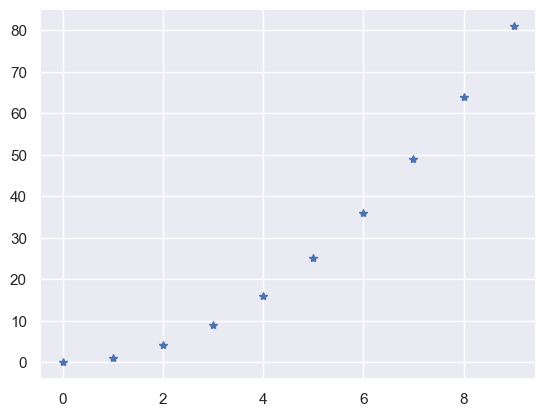

In [308]:
plt.plot(range(10), [x**2 for x in range(10)], '*')

In this example the range function returns an iterator whos values are 0 - 9. The range function is directly used fo the x coordinates in that plot. That same range call is used in the list comprehension generating the y coordinates. For this plot, I added the extra parameter, the string with the character * to change it from a line chart to marking the points individually.

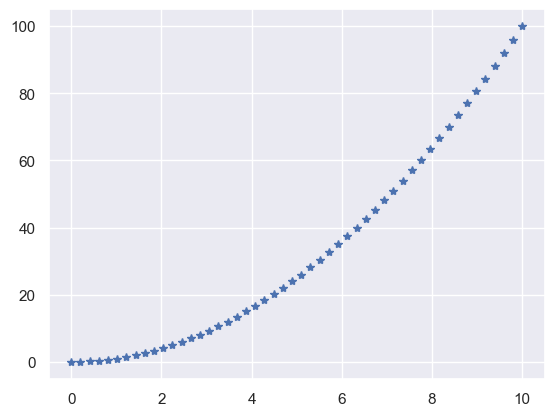

In [309]:
xs = np.linspace(0, 10)
plt.plot(xs, [x ** 2 for x in xs], "*" )

We get a similar looking chart, but with a lot more points. What does the linspace output look like?

In [310]:
xs

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [311]:
xs.shape

(50,)

`np.linspace` returns an array of numbers. the first number is the first argument, the last number is the second argument. The default output size is 50, The numbers in the middle are linearly interpolated between them, so they are evenly spaced in the range between the first and last numbers.

In [312]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Somewhat similar to the python `range` function. With `linspace` you specify the end values and the number of points.

In [313]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [314]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

`linspace` includes the n value, while `range` does not. `linspace` also defaults to floating point numbers.

In [315]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [316]:
np.arange(0,10,2, dtype='float64')

array([0., 2., 4., 6., 8.])

## Table of NumPy Functions for Array Creation
The following table lists the functions demonstrated in the previous videos. They cover much of the common usage creating new arrays that are not the products of computation. Links to the documentation are in the resources section.

| function  | usage |
|-----------|-------|
| `arange`  | Creates a new one dimensional array with contents similar to Python's range function. |
| `array`   | Creates a new array from an array-like input. |
| `asarray` | Creates a new array if input is array-like, but not an array. Returns input if it is already an array. |
| `fromiter`| Creates a new array from a Python iterable. More efficient if a length is passed in too. |
| `linspace`| Creates a new array with values evenly spaced between the specified end points. |
| `ones`    | Creates a new array initialized with ones. |
| `ones_like` | Creates a new array initialized with ones, matching the data type and size of an existing array. |
| `zeros`   | Creates a new array initialized with zeros. |
| `zeros_like` | Creates a new array initialized with zeros, matching the data type and size of an existing array. |

## 6.6 Lesson: Big Math
We will finally make use of the much vaunted efficiency of NumPy arrays. We will start with element-wise operations where the same operation is applied to every element (value) in an array or to every pair of corresponding elements in two arrays. We will then cover broadcasting, a generalization of the element-wise behavior that allows arrays of different shapes to be combined meaningfully. The smallest example of broadcasting, combining an array with a single scalar, is quite natural; each element in the array is individually combined with the scalar. Broadcasting generalizes that example allowing a variety of large array operations to be concisely described and efficiently computed.

### NumPy as an Array Calculator
This video will show off NumPy arrays to perform bulk calculations quickly, similar to using Python as a calculator in week 1, but with thousands or millions of numbers at once. Basic math operations and NumPy's large library of functions will both be highlighted.

In [317]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [318]:
y = np.array([[7,8,9], [10,11,12]])
y

array([[ 7,  8,  9],
       [10, 11, 12]])

Let's start with some basic arithmetic first.

In [319]:
x + y

array([[ 8, 10, 12],
       [14, 16, 18]])

When we add the arrays together, the addition was on the element-wise basis, so the first element of x was added to the first element of y, and so on and so forth.

In [320]:
x - y

array([[-6, -6, -6],
       [-6, -6, -6]])

In [321]:
x * y

array([[ 7, 16, 27],
       [40, 55, 72]])

In [322]:
x / y

array([[0.14285714, 0.25      , 0.33333333],
       [0.4       , 0.45454545, 0.5       ]])

In [323]:
x // y

array([[0, 0, 0],
       [0, 0, 0]])

In [324]:
 np.sin(x)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

## Handling Arrays of Different Shapes
This video introduces NumPy's handling of arrays with different shapes. Combining arrays with individual scalars have a simple intuitive behavior. Broadcasting generalizes that behavior in a powerful way.

In [325]:
#combine array with scalar
x = np.array([[0,1,2,3,4,5]])
x

array([[0, 1, 2, 3, 4, 5]])

In [326]:
 x + 10

array([[10, 11, 12, 13, 14, 15]])

if you combine an array with a scalar, we say that scalar is broadcast, and we bind with every number in that array. 

In [327]:
y = np.array([[0], [100], [200], [300], [400]])
y

array([[  0],
       [100],
       [200],
       [300],
       [400]])

In [328]:
x + y

array([[  0,   1,   2,   3,   4,   5],
       [100, 101, 102, 103, 104, 105],
       [200, 201, 202, 203, 204, 205],
       [300, 301, 302, 303, 304, 305],
       [400, 401, 402, 403, 404, 405]])

This just combined x with one row of 6 columns with y with 5 rows of one column for an array with 5 rows and 6 columns.

In [329]:
x.shape

(1, 6)

In [330]:
y.shape

(5, 1)

broadcasting will work if each array have the same length, or if one of them has length 1.

In [331]:
(x + y).shape

(5, 6)

## Computation on Arrays: Broadcasting
We saw in the previous section how NumPy's universal functions can be used to vectorize operations and thereby remove slow Python loops. Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

### Introducing Broadcasting
Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [332]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [333]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array `[5, 5, 5]`, and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [334]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [335]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [336]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [337]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both `a` and `b` to match a common shape, and the result is a two-dimensional array! The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the appendix, and is adapted from source published in the astroML documentation. Used by permission).

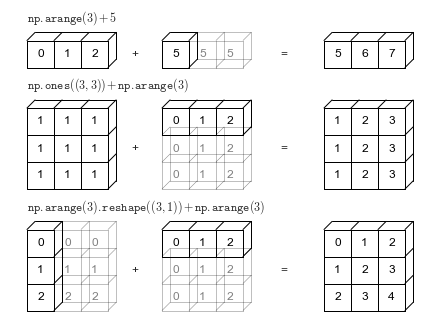

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.
To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1
Let's look at adding a two-dimensional array to a one-dimensional array:

In [338]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- `M.shape = (2, 3)`
- `a.shape = (3,)`

We see by rule 1 that the array `a` has fewer dimensions, so we pad it on the left with ones:

- `M.shape -> (2, 3)`
- `a.shape -> (1, 3)`

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- `M.shape -> (2, 3)`
- `a.shape -> (2, 3)`

The shapes match, and we see that the final shape will be `(2, 3)`:

In [339]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2
Let's take a look at an example where both arrays need to be broadcast:

In [340]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- `a.shape = (3, 1)`
- `b.shape = (3,)`

Rule 1 says we must pad the shape of b with ones:

- `a.shape -> (3, 1)`
- `b.shape -> (1, 3)`

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- `a.shape -> (3, 3)`
- `b.shape -> (3, 3)`

Because the result matches, these shapes are compatible. We can see this here:

In [341]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting Example 3
Now let's take a look at an example in which the two arrays are not compatible:

In [342]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix `M` is transposed. How does this affect the calculation? The shape of the arrays are

- `M.shape = (3, 2)`
- `a.shape = (3,)`

Again, rule 1 tells us that we must pad the shape of a with ones:

- `M.shape -> (3, 2)`
- `a.shape -> (1, 3)`

By rule 2, the first dimension of a is stretched to match that of `M`:

- `M.shape -> (3, 2)`
- `a.shape -> (3, 3)`

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [373]:
M + a

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

Note the potential confusion here: you could imagine making `a` and `M` compatible by, say, padding `a`'s shape with ones on the right rather than the left. But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the `np.newaxis` keyword introduced in The Basics of NumPy Arrays):

In [374]:
a[:, np.newaxis].shape

(3, 1)

In [375]:
M + a[:, np.newaxis]

array([[0.17884014, 0.68772795, 0.40226081, 0.15092894],
       [1.31477631, 1.51593677, 1.75373936, 1.07237938],
       [2.14997301, 2.43816894, 2.69456405, 2.24380266]])

Also note that while we've been focusing on the `+` operator here, these broadcasting rules apply to *any* binary ufunc. For example, here is the `logaddexp(a, b)` function, which computes `log(exp(a) + exp(b))` with more precision than the naive approach:

In [376]:
np.logaddexp(M, a[:, np.newaxis])

array([[0.78655991, 1.09500273, 0.91436938, 0.77145639],
       [1.40811325, 1.48012364, 1.57757832, 1.3332482 ],
       [2.14603174, 2.19041509, 2.23984675, 2.15930907]])

## Broadcasting in Practice
Broadcasting operations form the core of many examples we'll see throughout this book. We'll now take a look at a couple simple examples of where they can be useful.

## Centering an array
In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability. One commonly seen example is when centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values. Using the standard convention (see Data Representation in Scikit-Learn), we'll store this in a 10×3 array:

In [377]:
X = np.random.random((10,3))

We can compute the mean of each feature by using the `mean` aggregate across the first dimension:

In [378]:
Xmean = X.mean(0)
Xmean

array([0.40647027, 0.44407459, 0.36398265])

And now we can center the `X` array by subtracting the mean(this is the broadcasting operation)

In [379]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [380]:
X_centered.mean(0)

array([-8.8817842e-17, -4.4408921e-17, -4.4408921e-17])

To within machine precision the mean is now zero. 

### Plotting a two-dimensional function
One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function $z=f(x,y)$, broadcasting can be used to compute the function across the grid:

In [381]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

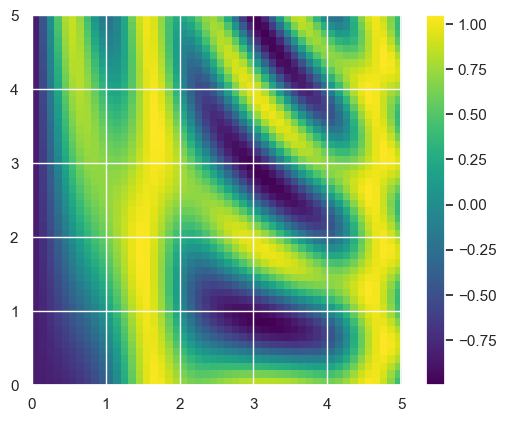

In [382]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

## Lesson 6.7: Reducing Arrays and Making a Universal Function
NumPy can also reduce arrays of numbers to smaller summaries or statistics in an efficient way. We will see a few examples of this, along with options to control the reduction.

### Reducing Arrays
This video gives examples of using NumPy to reduce arrays to smaller summaries or statistics of the data.

In [383]:
x = np.array([[1,3,6], [2,3,5]])
x

array([[1, 3, 6],
       [2, 3, 5]])

In [384]:
np.sum(x)

20

In [385]:
np.mean(x)

3.3333333333333335

In [386]:
np.max(x)

6

If you call one of these functions with an array, they will return a value summarizing the whole array. You can get a more granular summary by also passing an axis.

In [387]:
np.sum(x, axis=0)

array([ 3,  6, 11])

In [388]:
np.sum(x, axis=1)

array([10, 10])

In [389]:
x1 = np.sum(x, axis=1, keepdims=True)
x1

array([[10],
       [10]])

In [390]:
x1.shape

(2, 1)

if you already have an array, you can call the more common functions as methods on the array

In [391]:
np.sum(x)

20

If you are writing a function that might take in anything arry like as input, use the module function, which will handle the conversions automatically or use `np.asarray` if you'll repeatedly use the array data.

## Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

### Summing the Values in an Array
As a quick example, consider computing the sum of all values in an array. Python itself can do this using the built-in `sum` function:

In [392]:
L = np.random.random(100)
sum(L)

54.58939404484365

The syntax is quite similar to that of Numpy's `sum` function, and the result is the same in the simplest case.

In [393]:
np.sum(L)

54.58939404484368

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [394]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

48.3 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
180 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Be careful, though: the `sum` function and the `np.sum` function are not identical, which can sometimes lead to confusion! In particular, their optional arguments have different meanings, and `np.sum` is aware of multiple array dimensions, as we will see in the following section.

### Minimum and Maximum
Similarly, Python has built-in `min` and `max` functions, used to find the minimum value of any given array:

In [395]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [396]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [397]:
%timeit min(big_array)
%timeit np.min(big_array)

30.3 ms ± 91 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
115 µs ± 589 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


For `min`, `max`, `sum`, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [398]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500214.19758462254


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi-Dimensional Aggregates
One common type of aggregation operation is an aggregate along a row or column. Say you have some data stored in a two-dimensional array:

In [399]:
M = np.random.random((3,4))
print(M)

[[0.81250458 0.68306202 0.09142216 0.72943166]
 [0.49977781 0.88075176 0.77188336 0.33609389]
 [0.35670153 0.26486376 0.51351043 0.18439926]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [400]:
M.sum()

6.124402222351315

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying `axis=0`:

In [401]:
M.min(axis=0)

array([0.35670153, 0.26486376, 0.09142216, 0.18439926])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [402]:
M.min(axis=1)

array([0.09142216, 0.33609389, 0.18439926])

The way the axis is specified here can be confusing to users coming from other languages. The `axis` keyword specifies *the dimension of the array that will be collapsed*, rather than the dimension that will be returned. So specifying `axis=0` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

## Other Aggregation Functions
NumPy provides many other aggregation functions, but we won't discuss them in detail here. Additionally, most aggregates have a `NaN`-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value (for a fuller discussion of missing data, see Handling Missing Data). Some of these `NaN`-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

| Function Name    | NaN-safe Version    | Description                                    |
|------------------|---------------------|------------------------------------------------|
| `np.sum`         | `np.nansum`         | Compute sum of elements                        |
| `np.prod`        | `np.nanprod`        | Compute product of elements                    |
| `np.mean`        | `np.nanmean`        | Compute mean of elements                       |
| `np.std`         | `np.nanstd`         | Compute standard deviation                     |
| `np.var`         | `np.nanvar`         | Compute variance                               |
| `np.min`         | `np.nanmin`         | Find minimum value                             |
| `np.max`         | `np.nanmax`         | Find maximum value                             |
| `np.argmin`      | `np.nanargmin`      | Find index of minimum value                    |
| `np.argmax`      | `np.nanargmax`      | Find index of maximum value                    |
| `np.median`      | `np.nanmedian`      | Compute median of elements                     |
| `np.percentile`  | `np.nanpercentile`  | Compute rank-based statistics of elements      |
| `np.any`         | N/A                 | Evaluate whether any elements are true         |
| `np.all`         | N/A                 | Evaluate whether all elements are true         |

We will see these aggregates often throughout the rest of the book.

Example: What is the Average Height of US Presidents?
Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the heights of all US presidents. This data is available in the file president_heights.csv, which is a simple comma-separated list of labels and values:

In [403]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [404]:
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


Now that we have this data array, we can compute a variety of summary statistics:



In [405]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values. We may also wish to compute quantiles:

In [406]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in Chapter 4). For example, this code generates the following chart:

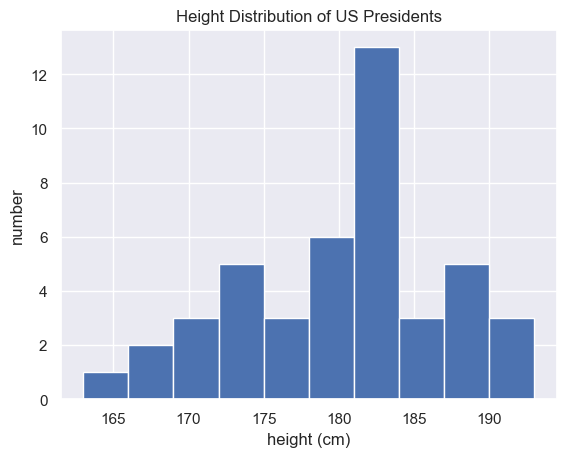

In [407]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

## Lesson 6.9: Universal Functions
A concept linking NumPy's element-wise computations, broadcasting, and reductions is universal functions, also called `ufuncs`. Each universal function is based on a function taking in a fixed number of inputs and returning a fixed number of outputs. For example, that function could take two inputs and add them together for one output. That function is then "vectorized" to handle many sets of inputs at once, and support for broadcasting, type casting, and other standard features are automatically added, resulting in a universal function.

### Making a Universal Function
This video shows an example of making and testing a universal function to illustrate how NumPy builds up a broad array and broadcast support from a simple function.

In [408]:
def my_add(x,y):
    return x + y

In [409]:
universal_my_add = np.frompyfunc(my_add, 2,1)

In [410]:
x = np.array([[0,5,10], [3,7,11]])
x

array([[ 0,  5, 10],
       [ 3,  7, 11]])

In [411]:
universal_my_add(x,x)

array([[0, 10, 20],
       [6, 14, 22]], dtype=object)

In [412]:
universal_my_add.reduce(x)

array([3, 12, 21], dtype=object)

It reduces the first dimension bye default, but you can pass the other dimension with the `axis` argument:

In [413]:
universal_my_add.reduce(x, axis =1)

array([15, 21], dtype=object)

An alternative from `pyfunc` is `np.factorize`. This does not give a full universal function, and does not include a built-in `reduce`, but you can specify the output type and keep the memory efficiency. 

In [414]:
vectorized_my_add = np.vectorize(my_add, otypes=['float64'])
vectorized_my_add

In [415]:
vectorized_my_add(x,x)

array([[ 0., 10., 20.],
       [ 6., 14., 22.]])

Broadcasting works with vectorize

In [416]:
vectorized_my_add([[1,2,3]], [[100], [200], [300]])

array([[101., 102., 103.],
       [201., 202., 203.],
       [301., 302., 303.]])

## Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world. Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy's *universal functions* (ufuncs). This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

### The Slowness of Loops
Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. Recently there have been various attempts to address this weakness: well-known examples are the PyPy project, a just-in-time compiled implementation of Python; the Cython project, which converts Python code to compilable C code; and the Numba project, which converts snippets of Python code to fast LLVM bytecode. Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element. For example, imagine we have an array of values and we'd like to compute the reciprocal of each. A straightforward approach might look like this:

In [417]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background. But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so! We'll benchmark this with IPython's `%timeit` magic (discussed in Profiling and Timing Code):

In [418]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

815 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result! When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow. It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

### Introducing UFuncs
For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [419]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [420]:
%timeit (1.0 / big_array)

930 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [421]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [422]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

In [423]:
c = np.asarray([[5.0], [3.2]])

In [424]:
np.shape(c)

(2, 1)

In [425]:
b = np.sin([0, 1])
b.dtype

dtype('float64')

In [426]:
n = np.add([0, 1, 2], [[3], [4], [5], [6]])
n.shape

(4, 3)

In [427]:
ones = np.ones((4,6))
ones

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [428]:
ones.std(keepdims=True).shape

(1, 1)

In [429]:
np.median(ones, axis=0).shape

(6,)

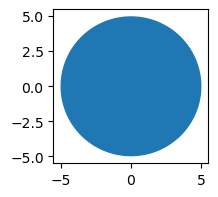

In [9]:
#p15 original
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))

#1000 evenly spaced values between -5 & 5
x15 = np.linspace(-5, 5, 1000)

#fills the area between 2 horizontal curves defined by points 'x', 'y1', and 'y2'
plt.fill_between(x15, -np.sqrt(25 - x15 * x15), np.sqrt(25 - x15 * x15))

None

In [14]:
plt.fill_between?